# Исследование надежности заемщиков.

# Цель исследования: 
исследовать зависимость семейного положения и количества детей клиента  банка на факт погашения кредита в срок.
# Ход исследования:
1. Обзор  данных 
2. Предобработка данных 
3. Проверка гипотез ( ответы на вопросы)
4. Итоги и общий вывод

### Шаг 1. Обзор данных

In [1]:
#импорт библиотеки и чтение файла с сохранением в df
import pandas as pd
df=pd.read_csv('/datasets/data.csv')
display( df)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,-4529.316663,43,среднее,1,гражданский брак,1,F,компаньон,0,224791.862382,операции с жильем
21521,0,343937.404131,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999.806512,сделка с автомобилем
21522,1,-2113.346888,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672.561153,недвижимость
21523,3,-3112.481705,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093.050500,на покупку своего автомобиля


In [2]:
# названия столбцов
df.columns

Index(['children', 'days_employed', 'dob_years', 'education', 'education_id',
       'family_status', 'family_status_id', 'gender', 'income_type', 'debt',
       'total_income', 'purpose'],
      dtype='object')

In [3]:
# типы данных таблицы
df.dtypes

children              int64
days_employed       float64
dob_years             int64
education            object
education_id          int64
family_status        object
family_status_id      int64
gender               object
income_type          object
debt                  int64
total_income        float64
purpose              object
dtype: object

In [4]:
# общая информация  о таблице
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [5]:
# размер таблицы
df.shape

(21525, 12)

# Описание данных:
12 стобцов

 1. children — количество детей в семье
 2. days_employed — общий трудовой стаж в днях
 3. dob_years — возраст клиента в годах
 4. education — уровень образования клиента
 5. education_id — идентификатор уровня образования
 6. family_status — семейное положение
 7. family_status_id — идентификатор семейного положения
 8. gender — пол клиента
 9. income_type — тип занятости
 10. debt — имел ли задолженность по возврату кредитов
 11. total_income — ежемесячный доход
 12. purpose — цель получения кредита

### Шаг 2.1 Заполнение пропусков

In [6]:
# подсчет пропусков
df.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

  <div class="alert alert-info"> определили  два столбца с пропусками days_employed и total_income ,
    доля пропусков около 10%

In [7]:
# заполнение пропусков медианным значением по столбцу
total_income_median=df['total_income'].median()
df['total_income']=df['total_income'].fillna(value=total_income_median)
display(df['total_income'])

0        253875.639453
1        112080.014102
2        145885.952297
3        267628.550329
4        158616.077870
             ...      
21520    224791.862382
21521    155999.806512
21522     89672.561153
21523    244093.050500
21524     82047.418899
Name: total_income, Length: 21525, dtype: float64

In [8]:
df['income_type'].value_counts()

сотрудник          11119
компаньон           5085
пенсионер           3856
госслужащий         1459
предприниматель        2
безработный            2
в декрете              1
студент                1
Name: income_type, dtype: int64

### Шаг 2.2 Проверка данных на аномалии и исправления.

In [9]:
# определяем значения ключевых статистик колонки со стажем до обработки
df['days_employed'].describe()

count     19351.000000
mean      63046.497661
std      140827.311974
min      -18388.949901
25%       -2747.423625
50%       -1203.369529
75%        -291.095954
max      401755.400475
Name: days_employed, dtype: float64

In [10]:
# метод .abs() возвращает значения по модулю
df['days_employed'] = df['days_employed'].abs()
display(df['days_employed'])

0          8437.673028
1          4024.803754
2          5623.422610
3          4124.747207
4        340266.072047
             ...      
21520      4529.316663
21521    343937.404131
21522      2113.346888
21523      3112.481705
21524      1984.507589
Name: days_employed, Length: 21525, dtype: float64

In [42]:
# функция для исправления аномальных значений
def fix_days_employed(row):

    if row['days_employed'] > row['dob_years'] * 365:
        max_possible_days_empl = (row['dob_years'] - 16) * 365
        return max_possible_days_empl
    else:
        return row['days_employed']


df['days_employed_correct'] = df.apply(fix_days_employed, axis=1)
display(df)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category,days_employed_correct
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью,8437.673028
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,C,операции с автомобилем,4024.803754
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,C,операции с недвижимостью,5623.422610
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,B,получение образования,4124.747207
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,C,проведение свадьбы,13505.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21449,1,4529.316663,43,среднее,1,гражданский брак,1,F,компаньон,0,224791,операции с жильем,B,операции с недвижимостью,4529.316663
21450,0,343937.404131,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999,сделка с автомобилем,C,операции с автомобилем,18615.000000
21451,1,2113.346888,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672,недвижимость,C,операции с недвижимостью,2113.346888
21452,3,3112.481705,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093,на покупку своего автомобиля,B,операции с автомобилем,3112.481705


In [43]:
# заполняем пропуски медианным значением по столбцу
df['days_employed'] = df['days_employed'].fillna(df['days_employed'].median())
display(df)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category,days_employed_correct
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью,8437.673028
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,C,операции с автомобилем,4024.803754
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,C,операции с недвижимостью,5623.422610
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,B,получение образования,4124.747207
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,C,проведение свадьбы,13505.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21449,1,4529.316663,43,среднее,1,гражданский брак,1,F,компаньон,0,224791,операции с жильем,B,операции с недвижимостью,4529.316663
21450,0,343937.404131,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999,сделка с автомобилем,C,операции с автомобилем,18615.000000
21451,1,2113.346888,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672,недвижимость,C,операции с недвижимостью,2113.346888
21452,3,3112.481705,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093,на покупку своего автомобиля,B,операции с автомобилем,3112.481705


### Шаг 2.3. Изменение типов данных.

In [13]:
# замена вещественного типа данных в столбце total_income  на целочисленный
df['total_income']=df['total_income'].astype('int')
display(df['total_income'])

0        253875
1        112080
2        145885
3        267628
4        158616
          ...  
21520    224791
21521    155999
21522     89672
21523    244093
21524     82047
Name: total_income, Length: 21525, dtype: int64

### Шаг 2.4. Удаление дубликатов.

In [14]:
#подсчет явных дубликатов
display(df.duplicated().sum())

54

In [15]:
# удаление явных дубликатов (с удалением старых индексов и формированием новых)
df=df.drop_duplicates().reset_index(drop=True)

In [16]:
# проверка на отсутствие дубликатов
display(df.duplicated().sum())

0

In [17]:
# Просмотр уникальных названий в столбце образование
display(df['education'].sort_values().unique())

array(['ВЫСШЕЕ', 'Высшее', 'НАЧАЛЬНОЕ', 'НЕОКОНЧЕННОЕ ВЫСШЕЕ',
       'Начальное', 'Неоконченное высшее', 'СРЕДНЕЕ', 'Среднее',
       'УЧЕНАЯ СТЕПЕНЬ', 'Ученая степень', 'высшее', 'начальное',
       'неоконченное высшее', 'среднее', 'ученая степень'], dtype=object)

In [18]:
# замена букв в значениях education на строчные
df['education']=df['education'].str.lower()
display(df['education'])


0         высшее
1        среднее
2        среднее
3        среднее
4        среднее
          ...   
21466    среднее
21467    среднее
21468    среднее
21469    среднее
21470    среднее
Name: education, Length: 21471, dtype: object

In [19]:
# проверка регистра и уникальных значений 
# удаление явных дубликатов (с удалением старых индексов и формированием новых)
display(df['education'].sort_values().unique())
df=df.drop_duplicates().reset_index(drop=True)
display(df.duplicated().sum())

array(['высшее', 'начальное', 'неоконченное высшее', 'среднее',
       'ученая степень'], dtype=object)

0

### Шаг 2.5. Формирование дополнительных датафреймов словарей, декомпозиция исходного датафрейма.

In [20]:
# создание нового датафрейма
df_education = df.pivot_table(index='education', values='education_id')
display(df_education)

,education_id
education,
высшее,0
начальное,3
неоконченное высшее,2
среднее,1
ученая степень,4


In [21]:
# создание нового датафрейма
df_family = df.pivot_table(index='family_status', values='family_status_id')
display(df_family)

,family_status_id
family_status,
Не женат / не замужем,4
в разводе,3
вдовец / вдова,2
гражданский брак,1
женат / замужем,0


In [22]:
# удаление столбцов education и family_status из исходного датафрейма
df.drop(['education', 'family_status'], axis = 1).reset_index()

,index,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose
0,0,1,8437.673028,42,0,0,F,сотрудник,0,253875,покупка жилья
1,1,1,4024.803754,36,1,0,F,сотрудник,0,112080,приобретение автомобиля
2,2,0,5623.422610,33,1,0,M,сотрудник,0,145885,покупка жилья
3,3,3,4124.747207,32,1,0,M,сотрудник,0,267628,дополнительное образование
4,4,0,340266.072047,53,1,1,F,пенсионер,0,158616,сыграть свадьбу
...,...,...,...,...,...,...,...,...,...,...,...
21449,21449,1,4529.316663,43,1,1,F,компаньон,0,224791,операции с жильем
21450,21450,0,343937.404131,67,1,0,F,пенсионер,0,155999,сделка с автомобилем
21451,21451,1,2113.346888,38,1,1,M,сотрудник,1,89672,недвижимость
21452,21452,3,3112.481705,38,1,0,M,сотрудник,1,244093,на покупку своего автомобиля


### Шаг 2.6. Категоризация дохода.

In [23]:
# создание столбца с категориями

def total_income_category(total_income):
    if total_income<=30000:
        return 'E'
    elif (total_income>=30001)& (total_income<=50000):
        return 'D'
    elif(total_income >=50001) & (total_income<=200000):
        return 'C'
    elif (total_income>=200001) & (total_income<=1000000):
        return 'B'
    elif (total_income>=1000001):
        return 'A'
    else :
        return '...'
df['total_income_category']=df['total_income'].apply(total_income_category)
display(df['total_income_category'].value_counts(dropna=False))

C    16016
B     5041
D      350
A       25
E       22
Name: total_income_category, dtype: int64

### Шаг 2.7. Категоризация целей кредита.

In [24]:
# функция к новому столбцу о целевых категориях
def purpose_category(purpose):
    if 'авто' in purpose:
        return'операции с автомобилем'
    elif ('жил' in purpose) or ('недв' in purpose): 
        return'операции с недвижимостью'
    elif 'сва' in purpose:
        return 'проведение свадьбы'
    elif 'обр' in purpose:
        return'получение образования'
    else:
            return '...'
df['purpose_category']=df['purpose'].apply(purpose_category)
display(df['purpose_category'].value_counts(dropna=False))

    

операции с недвижимостью    10811
операции с автомобилем       4306
получение образования        4013
проведение свадьбы           2324
Name: purpose_category, dtype: int64

###  Ответы на вопросы

In [25]:
df['children'].value_counts()

 0     14091
 1      4808
 2      2052
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

### 1.Вопрос : существует ли зависимость между колличеством детей и возвратом кредита в срок

In [26]:
df['children'].value_counts()

 0     14091
 1      4808
 2      2052
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

In [27]:
#замена ошибочного значения с 20 детей на 2

df = df.replace({'children':{20:2}})

#  метод .abs() возвращает значения по модулю 
df['children'] = df['children'].abs()

#объединяем в новую таблиццу
df_new=df.pivot_table(index='children',values='debt', aggfunc=['count','sum','mean'])
display(df_new)





,count,sum,mean
,debt,debt,debt
children,,,
0,14091,1063,0.075438
1,4855,445,0.091658
2,2128,202,0.094925
3,330,27,0.081818
4,41,4,0.097561
5,9,0,0.000000


 <div class="alert alert-info">  заменила аномальные значения 20 детей на 2 , взяля значения по модулю ( Избавилась от-1) и сделала сводную таблицу .
  

### 2. Вопрос:  есть ли  зависимость между семейным положением и возвратом кредита 

In [28]:
#создаем сводную таблицу

df_new_f = df.pivot_table(index='family_status_id',values='debt',  aggfunc=['count','sum','mean']) 


display(df_new_f)

,count,sum,mean
,debt,debt,debt
family_status_id,,,
0,12339,931,0.075452
1,4151,388,0.093471
2,959,63,0.065693
3,1195,85,0.071130
4,2810,274,0.097509


In [34]:
df_new_f.columns

MultiIndex([('count', 'debt'),
            (  'sum', 'debt'),
            ( 'mean', 'debt')],
           )

<AxesSubplot:title={'center':'Зависимость задолженности от семейного положения'}, xlabel='family_status_id'>

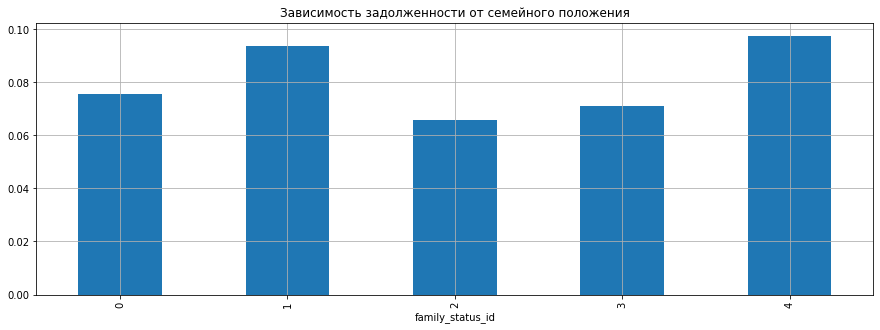

In [35]:
df_new_f['mean', 'debt'].plot(kind='bar', 
                                      figsize=(15, 5), 
                                      title='Зависимость задолженности от семейного положения', 
                                      grid=True)

<div class="alert alert-info">Больше всего  невозвратов  в категориях  1( гражданский брак) и 4( не женат\не замужем)
9.3% и 9.7% соответственно.Не привыкли люди к обязательствам))

### 3. ВОПРОС: Есть ли зависимость между уровнем дохода и возвратом кредита в срок

In [29]:
df_new_total_cat = df.pivot_table(index='total_income_category', values='debt', aggfunc=['count','sum','mean']) 

display(df_new_total_cat)




,count,sum,mean
,debt,debt,debt
total_income_category,,,
A,25,2,0.080000
B,5041,356,0.070621
C,16016,1360,0.084915
D,350,21,0.060000
E,22,2,0.090909


In [30]:
df_new_total_cat.columns

MultiIndex([('count', 'debt'),
            (  'sum', 'debt'),
            ( 'mean', 'debt')],
           )

<AxesSubplot:title={'center':'Распределение должников по группам дохода'}, xlabel='total_income_category'>

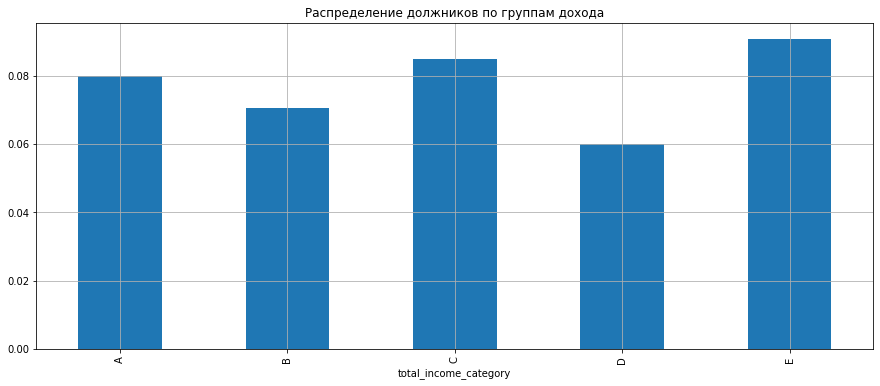

In [31]:
# 
df_new_total_cat['mean', 'debt'].plot(kind='bar', 
                                      figsize=(15, 6), 
                                      title='Распределение должников по группам дохода', 
                                      grid=True)

 <div class="alert alert-info">Самый большой процент должников в категории низкого  дохода 9%. Но и малочисленная категория А с большими доходами(> 1000001)демонстрирует 8% невозвратов , как и самая многочисленная категория С(50000-200000)-8.4%. Самыми отвественными оказались  в категории D(30000-50000)
6% должников. 

### 4. Вопрос : Как разные цели кредита влияют на его возврат

In [32]:
df_purpose_category= df.pivot_table(index='purpose_category',values='debt', aggfunc=['count','sum','mean'])  

display(df_purpose_category)

,count,sum,mean
,debt,debt,debt
purpose_category,,,
операции с автомобилем,4306,403,0.093590
операции с недвижимостью,10811,782,0.072334
получение образования,4013,370,0.092200
проведение свадьбы,2324,186,0.080034


In [36]:
df_purpose_category.columns

MultiIndex([('count', 'debt'),
            (  'sum', 'debt'),
            ( 'mean', 'debt')],
           )

<AxesSubplot:title={'center':'Распределение должников по целям кредита '}, xlabel='purpose_category'>

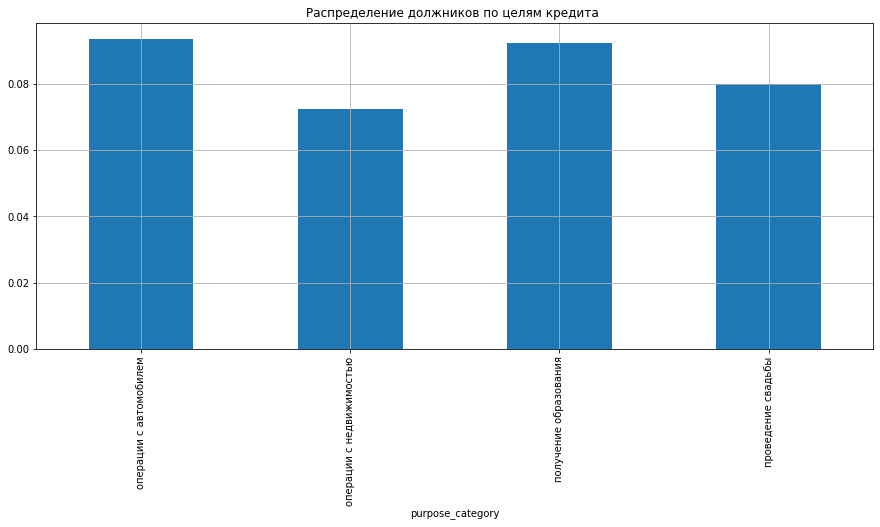

In [38]:
df_purpose_category['mean', 'debt'].plot(kind='bar', 
                                      figsize=(15, 6), 
                                      title='Распределение должников по целям кредита ', 
                                      grid=True)

<div class="alert alert-info">Наибольшее кол-во невозвратов в категории операции с автомобилем 9.3%  и получение образования 9.2%. Несмотря на то, что операции с недвижимостью являются наиболее частой целью кредита, процент задолженности здесь самый низкий 7.2%.Это вероятно можно объяснить серьезностью самой цели.Кредиты на операции с недвижимостью ,как правило большие по сумме и многолетние (например, ипотека) и решения о таких обязательствах принимаются обдуманно и взвешенно.
    
    
    
    

## Общий вывод: 

<div class="alert alert-info">
    Анализ предоставленных данных установил :
    
    1. Прямой зависимости от наличия детей и их колличества среди заемщиков банка не выявлено
    
    2.Семейное положение влияет на долговые обязательства, в должниках оказались незамужние\неженатые и    люди в гражданском браке( более 9% в обоих случаях).Самый низкий процент просрочек среди вдов\вдовцов( 6%), что возможно объяснить скорее всего более зрелым возрастом заемщиков ( но такую зависимость в данном исследовании не выявляли)
    3. Уровень доходов дастоверно не влияет на возврат кредитов в срок, кроме случаев экстремально низких доходов.
    
    4.Наилучшими целями кредита являются операции с недвижимостью . Несмотря на то, что эти цели самые многочисленные в структуре займов , процент невозврата здесь самый низкий(6%). Так же эта категория кредитов вероятно является предпочтительной и для банка.Эта категория кредитов , как правило обеспечивается самой кредитной недвижимостью( в качестве гарантийного залога ) и  позволяет осуществлять многолетнее сотрудничество с заемщиками тем самым извлекая дополнительный доход и лояльность
    
    
    
    
    